## Regression workbook

We want to predict the *Average Price* of a pumpkin

Import Neccessary Libraries


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read in all the CSV files

In [98]:
atlanta = pd.read_csv('archive/atlanta_9-24-2016_9-30-2017.csv')
baltimore = pd.read_csv('archive/baltimore_9-24-2016_9-30-2017.csv')
boston = pd.read_csv('archive/boston_9-24-2016_9-30-2017.csv')
chicago = pd.read_csv('archive/chicago_9-24-2016_9-30-2017.csv')
columbia = pd.read_csv('archive/columbia_9-24-2016_9-30-2017.csv')
dallas = pd.read_csv('archive/dallas_9-24-2016_9-30-2017.csv')

In [99]:
detroit = pd.read_csv('archive/detroit_9-24-2016_9-30-2017.csv')
los_angeles = pd.read_csv('archive/los-angeles_9-24-2016_9-30-2017.csv')
miami = pd.read_csv('archive/miami_9-24-2016_9-30-2017.csv')
new_york = pd.read_csv('archive/new-york_9-24-2016_9-30-2017.csv')
philadelphia =pd.read_csv('archive/philadelphia_9-24-2016_9-30-2017.csv')
san_fransisco = pd.read_csv('archive/san-fransisco_9-24-2016_9-30-2017.csv')
st_louis =pd.read_csv('archive/st-louis_9-24-2016_9-30-2017.csv')


In [304]:
#merge all datesets 

pumpkins = pd.concat([atlanta,baltimore,boston,chicago,columbia,dallas,detroit,los_angeles,miami,philadelphia,san_fransisco,st_louis],
 ignore_index= True)
pumpkins.shape


(1645, 29)

In [162]:
#check the value counts of each city

pumpkins['City Name'].value_counts()


BOSTON           352
COLUMBIA         263
CHICAGO          248
SAN FRANCISCO    166
BALTIMORE        153
DALLAS           137
ST. LOUIS        103
LOS ANGELES       62
ATLANTA           57
PHILADELPHIA      57
DETROIT           44
MIAMI              3
Name: City Name, dtype: int64

Clean Dataset

In [163]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Commodity Name   1645 non-null   object 
 1   City Name        1645 non-null   object 
 2   Type             45 non-null     object 
 3   Package          1645 non-null   object 
 4   Variety          1640 non-null   object 
 5   Sub Variety      278 non-null    object 
 6   Grade            0 non-null      float64
 7   Date             1645 non-null   object 
 8   Low Price        1645 non-null   float64
 9   High Price       1645 non-null   float64
 10  Mostly Low       1542 non-null   float64
 11  Mostly High      1542 non-null   float64
 12  Origin           1640 non-null   object 
 13  Origin District  116 non-null    object 
 14  Item Size        1374 non-null   object 
 15  Color            695 non-null    object 
 16  Environment      0 non-null      float64
 17  Unit of Sale  

In [164]:
pumpkins.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [165]:
pumpkins.tail()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments
1640,PUMPKINS,ST. LOUIS,NaN,22 lb cartons,MINIATURE,FLAT TYPE,NaN,09/30/2016,14.75,14.75,...,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN
1641,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/26/2016,275.00,275.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.,NaN,NaN
1642,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/27/2016,275.00,275.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN
1643,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/28/2016,275.00,275.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN
1644,PUMPKINS,ST. LOUIS,NaN,36 inch bins,MINIATURE,ROUND TYPE,NaN,09/29/2016,275.00,275.00,...,NaN,NaN,NaN,NaN,N,NaN,NaN,"MINIATURE LOWER, OTHERS STEADY.",NaN,NaN


In [305]:
#check for Missing


pumpkins.isna().sum()

Commodity Name        0
City Name             0
Type               1600
Package               0
Variety               5
Sub Variety        1367
Grade              1645
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                5
Origin District    1529
Item Size           271
Color               950
Environment        1645
Unit of Sale       1508
Quality            1645
Condition          1645
Appearance         1645
Storage            1645
Crop               1645
Repack                0
Trans Mode         1645
Offerings          1645
Market Tone        1542
Price Comment      1645
Comments           1645
dtype: int64

In [306]:
pumpkins.duplicated().sum()

0

In [307]:
#drop variables that have over 1000 missing values and selecting our variables of interest

new_columns = ['City Name','Package', 'Low Price', 'High Price', 'Date', 'Repack']

pumpkins = pumpkins.drop([ i for i in pumpkins.columns if i not in new_columns], axis=1)
pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   1645 non-null   object 
 1   Package     1645 non-null   object 
 2   Date        1645 non-null   object 
 3   Low Price   1645 non-null   float64
 4   High Price  1645 non-null   float64
 5   Repack      1645 non-null   object 
dtypes: float64(2), object(4)
memory usage: 77.2+ KB


In [168]:
pumpkins.head()

,City Name,Package,Date,Low Price,High Price,Repack
0,ATLANTA,24 inch bins,09/24/2016,140.0,154.75,N
1,ATLANTA,24 inch bins,09/24/2016,145.0,154.75,N
2,ATLANTA,24 inch bins,09/24/2016,150.0,154.75,N
3,ATLANTA,24 inch bins,09/24/2016,150.0,150.00,N
4,ATLANTA,24 inch bins,10/01/2016,140.0,154.75,N


In [308]:
pumpkins.duplicated().sum()

556

In [309]:
pumpkins = pumpkins.drop_duplicates()

In [310]:
pumpkins.shape

(1089, 6)

In [311]:
# Get the average pricing and add it as a column to the dataframe
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month




In [312]:
Model_data = pd.DataFrame({'City Name': pumpkins['City Name'] ,'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Repack':pumpkins['Repack'] ,'Price': price})

In [313]:
Model_data.describe()

,Month,Low Price,High Price,Price
count,1089.000000,1089.000000,1089.000000,1089.000000
mean,9.572084,123.383921,130.563076,126.973499
std,1.314019,86.393273,91.086761,88.452372
min,1.000000,0.240000,0.240000,0.240000
25%,9.000000,24.000000,24.500000,24.250000
50%,10.000000,140.000000,150.000000,140.000000
75%,10.000000,180.000000,200.000000,190.000000
max,12.000000,480.000000,480.000000,480.000000


In [314]:
Model_data['Repack'].value_counts()

N    1084
E       5
Name: Repack, dtype: int64

In [315]:
Model_data['Month'].unique()

#we adjust the price of 'bushel cartons', '1 1/9 bushel crates', '1 1/9 bushel cartons'

array([ 9, 10, 11,  4,  5,  6,  8, 12,  1,  2,  3,  7], dtype=int64)

In [316]:
#pumpkins sells at higher frequecy bwt the 9th and 12th month


Model_data['Month'].value_counts()

10    506
9     381
11    133
8      16
12     16
6       7
4       6
1       6
5       5
7       5
2       4
3       4
Name: Month, dtype: int64

In [317]:
Model_data.loc[Model_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

Model_data.loc[Model_data['Package'].str.contains(
    '1/2'), 'Price'] = price/(1/2)


In [318]:
Model_data[Model_data['Package'] == '1 1/9 bushel cartons']


,City Name,Month,Package,Low Price,High Price,Repack,Price
35,ATLANTA,11,1 1/9 bushel cartons,14.5,15.0,N,13.275
36,ATLANTA,11,1 1/9 bushel cartons,14.5,15.0,N,13.275
37,ATLANTA,11,1 1/9 bushel cartons,14.5,15.0,N,13.275
38,ATLANTA,11,1 1/9 bushel cartons,14.5,15.0,N,13.275
56,ATLANTA,9,1 1/9 bushel cartons,16.5,18.0,N,15.525
...,...,...,...,...,...,...,...
1348,PHILADELPHIA,10,1 1/9 bushel cartons,12.0,12.0,N,10.800
1349,PHILADELPHIA,10,1 1/9 bushel cartons,12.0,12.0,N,10.800
1350,PHILADELPHIA,8,1 1/9 bushel cartons,18.0,20.0,N,17.100
1351,PHILADELPHIA,9,1 1/9 bushel cartons,18.0,18.0,N,16.200


In [187]:
Model_data[Model_data['Package'] == '1/2 bushel cartons']


,City Name,Month,Package,Low Price,High Price,Repack,Price
180,BALTIMORE,9,1/2 bushel cartons,18.00,18.0,N,36.00
181,BALTIMORE,9,1/2 bushel cartons,15.00,15.0,N,30.00
182,BALTIMORE,10,1/2 bushel cartons,18.00,18.0,N,36.00
183,BALTIMORE,10,1/2 bushel cartons,15.00,15.0,N,30.00
184,BALTIMORE,10,1/2 bushel cartons,17.00,17.0,N,34.00
...,...,...,...,...,...,...,...
1626,ST. LOUIS,9,1/2 bushel cartons,15.00,15.0,N,30.00
1627,ST. LOUIS,9,1/2 bushel cartons,13.75,15.0,N,28.75
1628,ST. LOUIS,9,1/2 bushel cartons,10.75,15.0,N,25.75
1629,ST. LOUIS,9,1/2 bushel cartons,12.00,12.0,N,24.00


In [319]:
Model_data.shape

(1089, 7)

In [320]:
Model_data.duplicated().sum()

564

In [321]:
Model_data = Model_data.drop_duplicates()

In [322]:
Model_data

,City Name,Month,Package,Low Price,High Price,Repack,Price
0,ATLANTA,9,24 inch bins,140.00,154.75,N,147.375
1,ATLANTA,9,24 inch bins,145.00,154.75,N,149.875
2,ATLANTA,9,24 inch bins,150.00,154.75,N,152.375
3,ATLANTA,9,24 inch bins,150.00,150.00,N,150.000
4,ATLANTA,10,24 inch bins,140.00,154.75,N,147.375
...,...,...,...,...,...,...,...
1622,ST. LOUIS,9,1/2 bushel cartons,10.75,15.00,N,25.750
1623,ST. LOUIS,9,1/2 bushel cartons,12.00,12.00,N,24.000
1631,ST. LOUIS,9,22 lb cartons,16.75,16.75,N,16.750
1635,ST. LOUIS,9,22 lb cartons,14.75,14.75,N,14.750


In [323]:
Model_data["Month"].value_counts()

9     212
10    193
11     86
8      10
12      9
5       3
2       3
4       2
6       2
1       2
7       2
3       1
Name: Month, dtype: int64

In [324]:
Model_data.columns

Index(['City Name', 'Month', 'Package', 'Low Price', 'High Price', 'Repack',
       'Price'],
      dtype='object')

Visualizing Data


### Check Price Distribution

C:\Users\POPOOLA KAYODE\AppData\Local\Temp\ipykernel_16360\4074747589.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


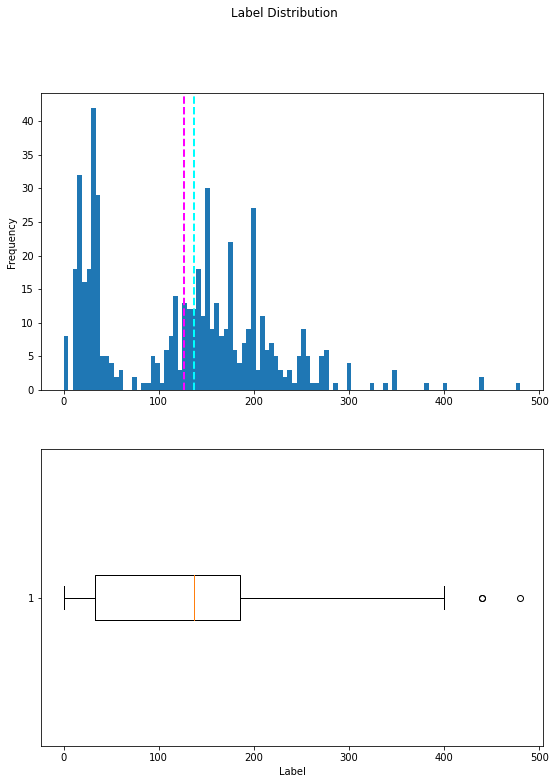

In [325]:
%matplotlib inline

label = Model_data[Model_data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()


### Remove outliers

C:\Users\POPOOLA KAYODE\AppData\Local\Temp\ipykernel_16360\3738849067.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


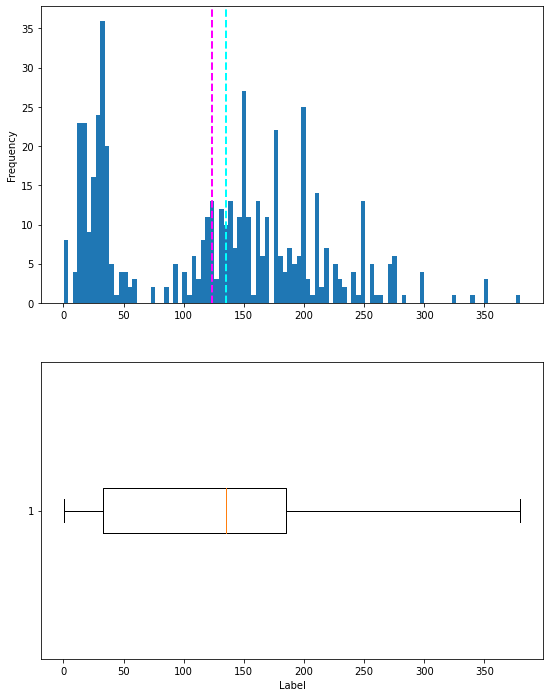

In [326]:
Model_data = Model_data[Model_data['Price'] < 400]

label = Model_data[Model_data.columns[-1]]

ig, ax = plt.subplots(2, 1, figsize=(9, 12))

# Plot the histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()


View categorical features

<AxesSubplot:xlabel='Month', ylabel='Price'>

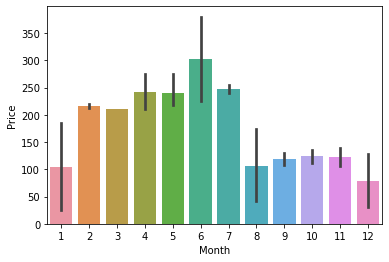

In [327]:
sns.barplot( x= 'Month' , y= 'Price', data= Model_data )

##more money was made in the sixth month



<AxesSubplot:xlabel='City Name'>

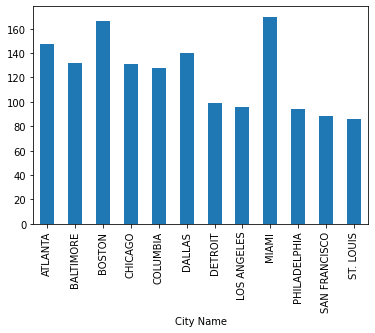

In [328]:
Model_data.groupby(['City Name'])['Price'].mean().plot(kind = 'bar' )

<AxesSubplot:xlabel='Repack'>

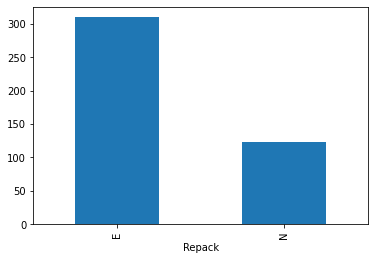

In [329]:
Model_data.groupby(['Repack'])['Price'].mean().plot(kind = 'bar' )

In [330]:
Model_data.pivot_table(values='Price',index='Month',columns='Package', dropna=True)


Package,1 1/9 bushel cartons,1 1/9 bushel crates,1/2 bushel cartons,20 lb cartons,22 lb cartons,24 inch bins,35 lb cartons,36 inch bins,40 lb cartons,50 lb cartons,50 lb sacks,bins,bushel baskets,bushel cartons,each
Month,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,25.0000,185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,275.000000,NaN,210.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,275.000000,NaN,221.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,380.000000,NaN,225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17.550000,NaN,38.000000,NaN,NaN,158.433333,NaN,255.000000,NaN,NaN,28.75,200.000,NaN,NaN,NaN
9,16.187500,13.95,32.817308,NaN,14.083333,167.348455,29.6875,173.118092,35.00,31.000000,25.75,151.875,49.25,22.25,60.000000


view numeric correlations

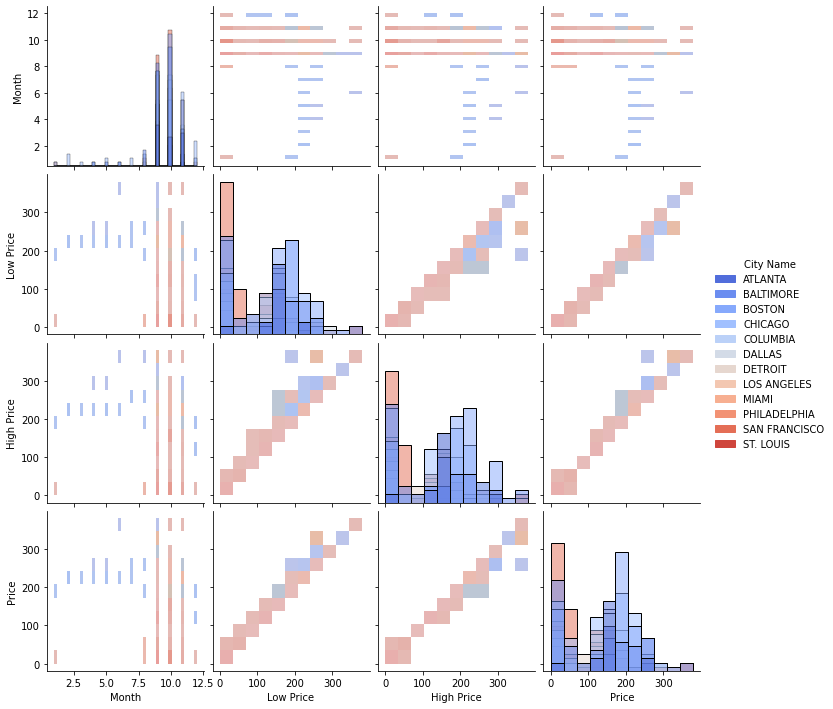

In [331]:
sns.pairplot(Model_data, hue= 'City Name', palette = 'coolwarm', kind= 'hist')

In [336]:
Model_data.corr()

,Month,Low Price,High Price,Price
Month,1.000000,-0.138363,-0.118604,-0.130827
Low Price,-0.138363,1.000000,0.982519,0.993557
High Price,-0.118604,0.982519,1.000000,0.994236
Price,-0.130827,0.993557,0.994236,1.000000


In [337]:
Model_data.head(5)

,City Name,Month,Package,Low Price,High Price,Repack,Price
0,ATLANTA,9,24 inch bins,140.0,154.75,N,147.375
1,ATLANTA,9,24 inch bins,145.0,154.75,N,149.875
2,ATLANTA,9,24 inch bins,150.0,154.75,N,152.375
3,ATLANTA,9,24 inch bins,150.0,150.00,N,150.000
4,ATLANTA,10,24 inch bins,140.0,154.75,N,147.375


In [338]:
New_pumpkins = pd.get_dummies(Model_data, columns= ['Month', 'Package','City Name', 'Repack'])

In [339]:
New_pumpkins.isna().sum()

Low Price                       0
High Price                      0
Price                           0
Month_1                         0
Month_2                         0
Month_3                         0
Month_4                         0
Month_5                         0
Month_6                         0
Month_7                         0
Month_8                         0
Month_9                         0
Month_10                        0
Month_11                        0
Month_12                        0
Package_1 1/9 bushel cartons    0
Package_1 1/9 bushel crates     0
Package_1/2 bushel cartons      0
Package_20 lb cartons           0
Package_22 lb cartons           0
Package_24 inch bins            0
Package_35 lb cartons           0
Package_36 inch bins            0
Package_40 lb cartons           0
Package_50 lb cartons           0
Package_50 lb sacks             0
Package_bins                    0
Package_bushel baskets          0
Package_bushel cartons          0
Package_each  

In [340]:
New_pumpkins.shape

(521, 44)

In [341]:
New_pumpkins.head()

,Low Price,High Price,Price,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,City Name_COLUMBIA,City Name_DALLAS,City Name_DETROIT,City Name_LOS ANGELES,City Name_MIAMI,City Name_PHILADELPHIA,City Name_SAN FRANCISCO,City Name_ST. LOUIS,Repack_E,Repack_N
0,140.0,154.75,147.375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,145.0,154.75,149.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,154.75,152.375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150.0,150.00,150.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140.0,154.75,147.375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [344]:
X = New_pumpkins.drop('Price', axis=1)
y = New_pumpkins['Price']

In [247]:
from sklearn import linear_model, model_selection

In [345]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)



In [346]:
X_train.shape, y_train.shape

((390, 43), (390,))

In [347]:
Model = linear_model.LinearRegression()
Model.fit(X_train, y_train)


LinearRegression()

In [348]:
X_test.shape, y_test.shape


((131, 43), (131,))

In [352]:
Prediction = Model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(Prediction)[:10])
print('Actual labels   : ' ,y_test[:10])


Predicted labels:  [143. 160.   0.  16. 129. 274.  32. 272.  18.  30.]
Actual labels   :  12      142.50
59      160.00
1289      0.24
702      16.20
45      129.25
1592    275.00
1502     32.50
354     272.50
1352     18.00
1512     30.00
Name: Price, dtype: float64


In [354]:
table = pd.DataFrame(
    {'predicted': np.round(Prediction), 'actual': y_test, 'error': (Prediction - y_test)})
table.head(10)




,predicted,actual,error
12,143.0,142.50,0.016848
59,160.0,160.00,-0.036516
1289,0.0,0.24,0.069714
702,16.0,16.20,0.017549
45,129.0,129.25,0.030045
1592,274.0,275.00,-1.212351
1502,32.0,32.50,-0.001967
354,272.0,272.50,-0.114174
1352,18.0,18.00,0.177297
1512,30.0,30.00,0.009865


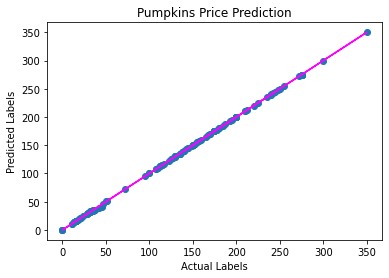

In [356]:
plt.scatter(y_test, Prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Pumpkins Price Prediction')
# overlay the regression line
z = np.polyfit(y_test, Prediction, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


In [358]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Prediction)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, Prediction)
print("R2:", r2)


MSE: 0.4754788655850882
RMSE: 0.6895497556993898
R2: 0.9999326323168393


## We see that increase in the size of data increase our prediction